In [6]:
#!pip install mlxtend

You should consider upgrading via the 'c:\users\tjoeun\anaconda3\python.exe -m pip install --upgrade pip' command.


In [7]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from mlxtend.plotting import category_scatter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
##########################################################################

In [8]:
df = pd.read_excel('df_pit_2(수정).xlsx', index_col=0)
X = df[['player_W', 'player_WPCT']].values
y = df['mvp'].values

In [8]:
##########################################################################

Text(0.5, 0, 'feature0 ** 2')

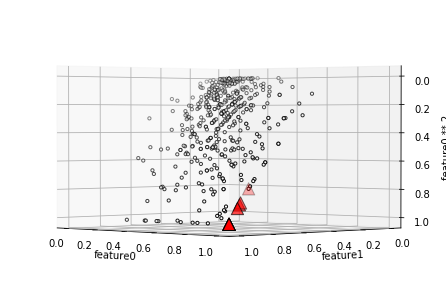

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# 2. 2번째 특성 제곱하여 추가</span>
X_new = np.hstack([X,X[:,1:]**2]) # 제곱을 새로운 열로 만들어 줌</span>
X_new

# 그래프 확인</span>
figure = plt.figure()
ax = Axes3D(figure, elev=-179, azim=-135) # 각도 틀어주는 파라미터 </span>
mask = y==0
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='w', s=10, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', marker = '^', s=150, edgecolor='k')
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature0 ** 2')

C:\Users\tjoeun\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning:

Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.



Text(0.5, 0, 'feature0 ** 2')

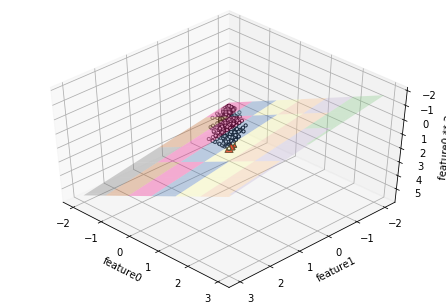

In [10]:
linear_svm_3d = LinearSVC(max_iter=10000).fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그려주기</span>

figure = plt.figure()
ax = Axes3D(figure, elev=-135, azim=-135)

xx = np.linspace(X_new[:,0].min() - 2, X_new[:,0].max()+2,50)
yy = np.linspace(X_new[:,1].min() - 2, X_new[:,1].max()+2,50)
# 평면 그려주기 위해 조금 범위 넓게 (+2) 만큼 해줌</span>

XX,YY = np.meshgrid(xx,yy)
ZZ = (coef[0]*XX+coef[1]*YY+intercept)/(-coef[2])

ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3,cmap=cm.Accent)

ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='W', s=10, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', marker = '^', s=60, edgecolor='k')
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature0 ** 2')

In [11]:
df = pd.read_excel('df_pit_2(수정).xlsx', index_col=0)
X = df[['player_W', 'player_WPCT', 'player_ERA']].values
y = df['mvp'].values
Y = df['mvp'].values

In [12]:
from plotly.offline import plot, iplot
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

from sklearn.datasets import make_swiss_roll

In [15]:
data = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],#X[:,1]**2
    text = ['point #{}'.format(i) for i in range(X.shape[0])],
    mode='markers',
    marker=dict(
        size=3,
        color=y,
        colorscale='Jet',
        line=dict(
            #color='rgba(217, 217, 217, 0.14)',
            #color='rgb(217, 217, 217)',
            width=0.0
        ),
        opacity=0.8
    )
)

layout = go.Layout(
    autosize=False,
    width=500,
    height=500,
    margin=go.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    #paper_bgcolor='#7f7f7f',
    #plot_bgcolor='#c7c7c7'
)

fig = go.Figure(data=[data], layout=layout)
iplot(fig)
plot(fig, filename='plotly-3d-scatter-small.html', auto_open=False)

'plotly-3d-scatter-small.html'

In [25]:
df = pd.read_excel('df_pit_2(수정).xlsx', index_col=0)
X = df[['player_W', 'player_WPCT', 'player_ERA']].values
Y = df['mvp'].values

In [28]:
import numpy as np
from sklearn.svm import SVC

X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

svc = SVC(kernel='linear', C=1E10)
a = svc.fit(X,Y)

z = lambda x,y: (-a.intercept_[0]-a.coef_[0][0]*x-a.coef_[0][1]*y) / a.coef_[0][2]

xm, xM = X[:,0].min(), X[:, 0].max()
ym, yM = X[:,1].min(), X[:, 1].max()
x = np.linspace(xm, xM, 10)
y = np.linspace(ym, yM, 10)
x, y =np.meshgrid(x, y)
#tmp = np.linspace(-5,5,30)
#x,y = np.meshgrid(tmp,tmp)

my_colorscale= [[0, 'rgb(120,120,120)'], [1, 'rgb(0,0,0)']]
fig = go.Figure()
fig.add_surface(x=x, y=y, z=z(x,y), colorscale=my_colorscale, showscale=False, opacity=0.9)
fig.add_scatter3d(x=X[Y==0,0], y=X[Y==0,1], z=X[Y==0,2], mode='markers', marker={'color': 'blue'})
fig.add_scatter3d(x=X[Y==1,0], y=X[Y==1,1], z=X[Y==1,2], mode='markers', marker={'color': 'red'})
fig.update_layout(width=800, height=800)
fig.show()

In [16]:
df = pd.read_excel('df_hit_2(수정).xlsx', index_col=0)
X = df[['player_RH', 'player_TB', 'player_HH']].values
Y = df['mvp'].values

In [17]:
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

svc = SVC(kernel='linear', C=1E10)
svc.fit(X,Y)

z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]*y) / svc.coef_[0][2]

xm, xM = X[:,0].min(), X[:, 0].max()
ym, yM = X[:,1].min(), X[:, 1].max()
x = np.linspace(xm, xM, 10)
y = np.linspace(ym, yM, 10)
x, y =np.meshgrid(x, y)
#tmp = np.linspace(-5,5,30)
#x,y = np.meshgrid(tmp,tmp)

my_colorscale= [[0, 'rgb(120,120,120)'], [1, 'rgb(0,0,0)']]
fig = go.Figure()
fig.add_surface(x=x, y=y, z=z(x,y), colorscale=my_colorscale, showscale=False, opacity=0.9)
fig.add_scatter3d(x=X[Y==0,0], y=X[Y==0,1], z=X[Y==0,2], mode='markers', marker={'color': 'blue'})
fig.add_scatter3d(x=X[Y==1,0], y=X[Y==1,1], z=X[Y==1,2], mode='markers', marker={'color': 'red'})
fig.update_layout(width=800, height=800)
fig.show()